# K-Nearest Neighbors (K-NN)

## Importing the libraries

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [51]:
dataset = pd.read_csv('society.csv')
print(dataset)
X = dataset.iloc[0:200, :2].values
print(X)
y = dataset.iloc[0:200, 3].values

      Age        BMI  COVID  BP  Hyper Tension  Diabities Block No  Flat No  \
0      43  12.940000      1   0              0          1        A    101.0   
1      45  21.913806      0   0              0          0        A    101.0   
2      41  31.708284      0   0              0          0        A    101.0   
3      12  24.355421      0   0              0          0        A    101.0   
4      25  32.140248      0   0              0          0        A    102.0   
...   ...        ...    ...  ..            ...        ...      ...      ...   
1195   18  28.040378      0   0              1          1        H   1003.0   
1196   35  27.664604      1   1              0          0        H   1003.0   
1197   69  27.407657      1   0              0          0        H   1004.0   
1198   58  16.528926      1   0              0          1        H   1004.0   
1199   48  22.317001      0   1              0          0      NaN      NaN   

          Name  Height(m)  Weight(kg)  
0         A

## Splitting the dataset into the Training set and Test set

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [53]:
print(X_train)

[[28.         36.13561484]
 [29.         39.46352484]
 [92.         36.96082914]
 [ 5.         24.22145329]
 [42.         25.51020408]
 [80.         33.96239627]
 [19.         30.1102789 ]
 [ 6.         29.16869227]
 [45.         23.93898977]
 [10.         30.19575177]
 [58.         22.76943835]
 [85.         30.66299054]
 [52.         28.29334541]
 [36.         38.26530612]
 [62.         26.53061224]
 [41.         22.09317005]
 [45.         24.4646016 ]
 [38.         22.44801512]
 [12.         37.75510204]
 [52.         26.21882086]
 [20.         28.69592943]
 [60.         27.68877813]
 [92.         14.03445908]
 [24.         13.85041551]
 [41.         45.98765432]
 [59.         35.19619501]
 [62.         25.31545429]
 [27.         27.39800347]
 [25.         28.06894434]
 [27.         29.666548  ]
 [42.         29.38475666]
 [45.         19.62323391]
 [52.         22.16066482]
 [25.         34.71533426]
 [42.         23.58832922]
 [25.         14.80222582]
 [41.         31.70828379]
 

In [54]:
print(y_train)

[0 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 1 0 1 0 0
 0 0 1 0 0 1 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 0 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 1 0 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 0
 0 1]


In [55]:
print(X_test)

[[24.         32.45567772]
 [52.         29.38467611]
 [52.         33.13609467]
 [27.         34.21940091]
 [28.         34.76990504]
 [71.         28.1969212 ]
 [78.         27.35042735]
 [46.         35.71428571]
 [25.         21.30177515]
 [65.         13.01541025]
 [28.         26.89618074]
 [28.         20.6758034 ]
 [58.         25.40281608]
 [52.         26.66666667]
 [38.         39.38533058]
 [35.         29.11452647]
 [43.         16.41206918]
 [51.         19.62323391]
 [34.         19.59631589]
 [26.         35.2094965 ]
 [82.         37.34559035]
 [45.         30.1102789 ]
 [38.         25.07619305]
 [28.         24.8015873 ]
 [20.         26.0261749 ]
 [28.         34.8880437 ]
 [37.         28.69265285]
 [51.         22.5308642 ]
 [21.         24.8015873 ]
 [34.         22.7189744 ]
 [62.         21.65510814]
 [41.         35.49215792]
 [41.         25.77251808]
 [32.         29.72839061]
 [12.         22.31327843]
 [90.         25.35925613]
 [49.         37.57431629]
 

In [56]:
print(y_test)

[0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 1 1 1 1
 0 0 1 1 0 0 0 1 0 0 0 1 0]


## Feature Scaling

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [58]:
print(X_train)

[[-0.58657208  1.19100773]
 [-0.53822823  1.67419655]
 [ 2.50743452  1.31082296]
 [-1.69848071 -0.53884364]
 [ 0.09024186 -0.35172621]
 [ 1.92730828  0.87547188]
 [-1.02166676  0.31617188]
 [-1.65013685  0.17946021]
 [ 0.23527342 -0.57985533]
 [-1.45676144  0.32858193]
 [ 0.86374351 -0.74966587]
 [ 2.16902754  0.39642167]
 [ 0.57368039  0.05236608]
 [-0.19982126  1.50022373]
 [ 1.05711892 -0.20357022]
 [ 0.04189801 -0.84785521]
 [ 0.23527342 -0.50354024]
 [-0.10313355 -0.79633423]
 [-1.36007374  1.42614573]
 [ 0.57368039 -0.2488401 ]
 [-0.97332291  0.11081841]
 [ 0.96043122 -0.03541278]
 [ 2.50743452 -2.01792262]
 [-0.7799475  -2.04464444]
 [ 0.04189801  2.62145367]
 [ 0.91208736  1.05461066]
 [ 1.05711892 -0.38000249]
 [-0.63491594 -0.07763119]
 [-0.73160364  0.01978464]
 [-0.63491594  0.25174531]
 [ 0.09024186  0.21083122]
 [ 0.23527342 -1.20647234]
 [ 0.57368039 -0.83805545]
 [-0.73160364  0.98479311]
 [ 0.09024186 -0.63076875]
 [-0.73160364 -1.90644836]
 [ 0.04189801  0.5481908 ]
 

In [59]:
print(X_test)

[[-0.7799475   0.65670708]
 [ 0.57368039  0.21081952]
 [ 0.57368039  0.75549877]
 [-0.63491594  0.91278712]
 [-0.58657208  0.9927164 ]
 [ 1.4922136   0.03836597]
 [ 1.83062057 -0.0845389 ]
 [ 0.28361727  1.12983374]
 [-0.73160364 -0.96276011]
 [ 1.20215048 -2.16588125]
 [-0.58657208 -0.15049227]
 [-0.58657208 -1.05364675]
 [ 0.86374351 -0.36731818]
 [ 0.57368039 -0.18381608]
 [-0.10313355  1.6628433 ]
 [-0.24816511  0.17159572]
 [ 0.13858571 -1.67271058]
 [ 0.52533654 -1.20647234]
 [-0.29650897 -1.21038064]
 [-0.68325979  1.05654194]
 [ 2.02399599  1.36668755]
 [ 0.23527342  0.31617188]
 [-0.10313355 -0.41474152]
 [-0.58657208 -0.45461232]
 [-0.97332291 -0.27681092]
 [-0.58657208  1.00986929]
 [-0.15147741  0.11034268]
 [ 0.52533654 -0.78430513]
 [-0.92497906 -0.45461232]
 [-0.29650897 -0.75699287]
 [ 1.05711892 -0.91145868]
 [ 0.04189801  1.09758237]
 [ 0.04189801 -0.31364009]
 [-0.39319667  0.26072442]
 [-1.36007374 -0.81589704]
 [ 2.41074681 -0.37364278]
 [ 0.42864883  1.39989693]
 

## Training the K-NN model on the Training set

In [60]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

## Predicting a new result

In [61]:
print(classifier.predict(sc.transform([[30,600]])))

[1]


## Predicting the Test set results

In [62]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 0]
 [0 1]
 [0 1]
 [0 1]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 1]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]]


## Making the Confusion Matrix

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[26  5]
 [14  5]]


0.62

## Visualising the Training set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


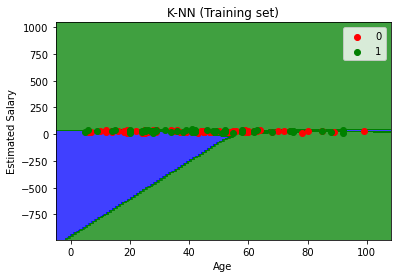

In [64]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

## Visualising the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


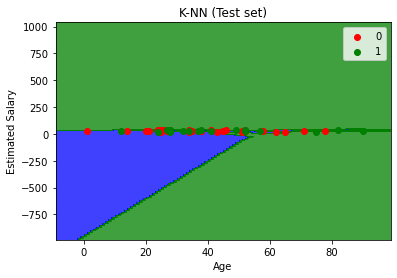

In [65]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(X_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()